In [21]:
#!pip install pydealer


In [1]:
import pydealer

class Card(object):

    card_values = {
        'Ace': 11,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'Jack': 10,
        'Queen': 10,
        'King': 10
    }

    def __init__(self, suit, value):
        self.suit = suit.capitalize()
        self.value = value
        self.points = self.card_values[value]

def ascii_version_of_card(cards, add_inv = False):
    suits_name = ['Spades', 'Diamonds', 'Hearts', 'Clubs']
    suits_symbols = ['♠', '♦', '♥', '♣']
    lines = [[] for i in range(9)]

    for index, card in enumerate(cards):
      if card.value == '10': 
          value = card.value
          space = ''
      else:
          value = card.value[0]
          space = ' ' 
      # suit = suits_name.index(card.suit)
      suit = suits_symbols[suits_name.index(card.suit)]

      lines[0].append('┌─────────┐')
      lines[1].append('│{}{}       │'.format(value, space))
      lines[2].append('│         │')
      lines[3].append('│         │')
      lines[4].append('│    {}    │'.format(suit))
      lines[5].append('│         │')
      lines[6].append('│         │')
      lines[7].append('│       {}{}│'.format(space, value))
      lines[8].append('└─────────┘')

    result = []
    for index, line in enumerate(lines):
      if(add_inv == False):
        result.append(''.join(lines[index]))
      else:
        lines[index].append(" ~ * * * ~ ")
        result.append(''.join(lines[index]))

    return '\n'.join(result)


deck = pydealer.Deck()
deck.shuffle()
hand = deck.deal(2)
dealer_v = deck.deal(1)
dealer_nv = deck.deal(1)

pull = deck.deal(1)
hand.add(pull)

hand.cards[0]
print("####### Dealer #######")
print(ascii_version_of_card(dealer_v.cards, True))
print(">>----- Agents -----<<")
print(ascii_version_of_card(hand.cards))

print("######################")






####### Dealer #######
┌─────────┐ ~ * * * ~ 
│9        │ ~ * * * ~ 
│         │ ~ * * * ~ 
│         │ ~ * * * ~ 
│    ♥    │ ~ * * * ~ 
│         │ ~ * * * ~ 
│         │ ~ * * * ~ 
│        9│ ~ * * * ~ 
└─────────┘ ~ * * * ~ 
>>----- Agents -----<<
┌─────────┐┌─────────┐┌─────────┐
│10       ││4        ││3        │
│         ││         ││         │
│         ││         ││         │
│    ♦    ││    ♠    ││    ♠    │
│         ││         ││         │
│         ││         ││         │
│       10││        4││        3│
└─────────┘└─────────┘└─────────┘
######################


In [32]:
import numpy as np

class Table(object): 
  card_values = {
        'Ace_used': 1,
        'Ace': 11,
        '2': 2,
        '3': 3,
        '4': 4,
        '5': 5,
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
        '10': 10,
        'Jack': 10,
        'Queen': 10,
        'King': 10
    }

  def hit(self):
    new_card = self.deck.deal(1)
    self.hand_sum += self.card_values[new_card[0].value]
    self.hand.add(new_card)

    if(self.hand_sum > 21):
      for i in self.hand:
        if i.value == 'Ace':
          i.value = 'Ace_used'
          self.hand_sum -= 10
          return 

  def check(self):
    self.dealer_v.add(self.dealer_nv)
    self.dealer_sum += (self.card_values[self.dealer_nv[0].value])

    while(self.dealer_sum < 17):
      new_card = self.deck.deal(1)
      self.dealer_sum += self.card_values[new_card[0].value]
      self.dealer_v.add(new_card)

      if(self.dealer_sum > 21):
        for i in self.dealer_v:
          if i.value == 'Ace':
            i.value = 'Ace_used'
            self.dealer_sum -= 10
            break
             
    

  def __str__(self):
    ret = "####### Dealer #######\n"
    ret += ascii_version_of_card(self.dealer_v.cards, False) 
    ret += "\n>>----- Agents -----<<\n"
    ret += ascii_version_of_card(self.hand.cards)
    ret += "\n######################\n"
    return ret

  def __init__(self):
    self.deck = pydealer.Deck()
    self.deck.shuffle()
    self.hand = self.deck.deal(2)
    self.dealer_v = self.deck.deal(1)
    self.dealer_nv = self.deck.deal(1)

    
    self.hand_sum = 0
    for i in self.hand:
      self.hand_sum += self.card_values[i.value]
    self.dealer_sum = 0
    for i in self.dealer_v:
      self.dealer_sum += self.card_values[i.value]
    if(self.hand_sum > 21):
      for i in self.hand:
        if i.value == 'Ace':
          i.value = 'Ace_used'
          self.hand_sum -= 10
          break

hit_win = np.full((10, 18), 1)
hit_play = np.full((10, 18), 1)
check_win = np.full((10, 18), 1)
check_play = np.full((10, 18), 1)

for _ in range(100000):
  play = True
  k = Table()
  x = k.dealer_sum - 2
  y = k.hand_sum - 4
  while(play):
    #if((hit_win[x, y] / hit_play[x, y] * np.random.rand(1) - check_win[x, y] / check_play[x, y] * np.random.rand(1)) >= 0):
    print(x, y)
    if(check_win[x, y] / check_play[x, y] > (0.5 + np.random.normal(0, 0.05))):
      k.check()#zameniti sa hit ako se koristi prvi if
    else:
      k.hit()
    if(k.hand_sum > 21 or k.dealer_sum >= 17):
      play = False
      break
    y = k.hand_sum - 4
    
  if(k.hand_sum == k.dealer_sum):
    pass
  elif(k.hand_sum > 21):
    hit_play[x, y] += 1
  elif(k.dealer_sum > 21 or k.dealer_sum < k.hand_sum):
    check_win[x, y] += 1
    check_play[x, y] += 1
  else: #diler veca suma
    check_play[x, y] += 1






8 7
3 5
4 10
6 11
4 5
8 11
1 5
8 7
8 17
0 6
6 12
8 16
8 11
8 14
3 11
8 15
6 8
8 9
2 13
8 13
1 13
7 11
8 10
5 13
2 8
8 17
7 10
5 6
2 5
8 8
3 4
2 9
9 11
2 16
4 9
1 9
1 5
7 17
9 8
8 4
5 7
5 12
3 3
8 11
9 5
3 8
2 12
9 15
8 7
8 10
8 14
0 9
2 16
8 9
1 9
8 7
8 17
8 13
9 14
6 10
8 17
6 13
2 16
9 4
5 17
6 10
1 17
4 2
5 11
8 13
1 6
9 12
8 8
8 17
8 16
0 8
8 15
7 14
2 10
9 12
9 8
9 17
8 11
1 16
9 12
6 14
8 4
7 15
7 15
4 14
3 6
3 8
6 6
0 11
8 12
3 7
8 12
9 6
2 10
0 9
0 12
5 9
8 10
8 8
1 14
8 15
3 4
0 13
8 16
8 13
9 12
4 14
9 13
1 14
1 17
8 9
2 8
8 8
9 1
8 11
5 12
7 10
1 12
9 3
2 16
8 11
8 12
7 10
2 16
9 5
9 13
2 16
8 14
1 16
6 6
6 16
8 9
8 14
0 3
5 15
0 14
5 17
9 10
1 14
4 16
8 15
8 1
2 3
8 7
8 9
8 8
9 17
9 2
9 12
8 10
8 6
0 16
5 8
1 11
1 8
4 1
2 9
8 13
2 17
8 6
8 11
8 16
0 14
4 1
4 11
2 12
8 16
6 15
8 15
5 8
5 17
7 15
8 3
8 7
8 17
7 16
1 16
1 7
4 16
1 7
0 15
8 12
2 10
5 8
3 10
4 8
1 13
2 8
8 7
8 10
8 16
0 13
6 9
9 10
9 13
9 9
0 14
7 3
8 14
9 14
1 1
8 4
9 17
7 12
8 9
4 13
6 12
6 16
8 16
1 9
8 16
8 

[[ 0.25  0.67  0.67  0.67  0.6   0.67  0.47  0.54 -0.35 -0.31 -0.31 -0.31
  -0.32 -0.32 -0.51  0.23  0.14  0.  ]
 [ 0.25  0.67  0.67  0.54  0.39  0.45  0.56  0.67 -0.3  -0.31 -0.37 -0.38
  -0.5  -0.31 -0.32 -0.4   0.17  0.  ]
 [ 0.2   0.67  0.5   0.53  0.67  0.48  0.67  0.67 -0.38 -0.49 -0.38 -0.39
  -0.31 -0.39 -0.32 -0.32  0.11  0.  ]
 [ 0.5   0.33  0.67  0.28  0.5   0.67  0.67  0.4  -0.28 -0.3  -0.41 -0.31
  -0.41 -0.39  0.31 -0.47  0.18  0.  ]
 [ 0.25  0.33  0.5   0.67  0.52  0.67  0.6   0.49 -0.35 -0.31 -0.31 -0.36
  -0.32 -0.46 -0.44  0.13  0.1   0.  ]
 [ 0.5   0.6   0.67  0.6   0.6   0.62  0.67  0.6  -0.29 -0.33 -0.34 -0.31
  -0.31 -0.32 -0.32  0.16  0.08  0.  ]
 [ 0.67  0.6   0.67  0.67  0.67  0.62  0.6   0.67 -0.35 -0.31 -0.35 -0.31
  -0.31 -0.32 -0.13  0.14  0.07  0.  ]
 [ 0.67  0.6   0.67  0.67  0.57  0.67  0.67  0.67 -0.27 -0.36 -0.36 -0.37
  -0.38 -0.32 -0.37 -0.63  0.09  0.  ]
 [ 0.67  0.67  0.67  0.67  0.67  0.67  0.67  0.67 -0.33 -0.37 -0.33 -0.36
  -0.37 -0.33 -0.33 -0

<AxesSubplot:>

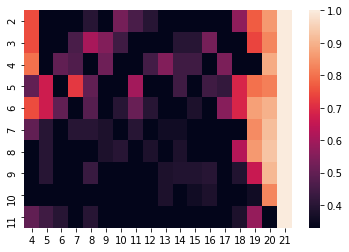

In [35]:
import numpy as np
import pandas as pd 
import seaborn as sns


#print(hit_win)
#print("\n")
#print(hit_play)
#print("\n")
#print(check_win)
#print("\n")
#print(check_play)
#print("\n")
print((hit_win/hit_play - check_win/check_play).round(2))
print("\n")
print((check_win/check_play).round(2))

df = pd.DataFrame((check_win/check_play).round(2), range(2,12), range(4,22))
sns.heatmap(df)
